# Proyecto 2-Parte II (Core)

## Parte II: Preprocesamiento y Optimización

<strong>Objetivo:</strong> Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.

## Instrucciones Detalladas

### Parte 1: Preprocesamiento de Datos.

#### 1. Limpieza de Datos:

* Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).
* Manejar los outliers mediante técnicas de filtrado o transformación.

#### 2. Transformación de Columnas:

* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
* Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.
* Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.

#### 3. Creación de Pipelines:

* Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.
* Incluir todos los pasos de preprocesamiento en el pipeline.

### Parte 2: Selección de Técnica de Machine Learning

#### 1. Entrenamiento Inicial:

* Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).
* Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.

#### 2. Comparación de Modelos:

* Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).
* Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.

### Parte 3: Optimización de Hiperparámetros

#### 1. GridSearchCV:

* Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.
* Definir el espacio de búsqueda para los hiperparámetros relevantes.

#### 2. RandomizedSearchCV:

* Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.

#### 3. Optina:

* Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.

#### 4. Evaluación de Modelos Optimizados:

* Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.
* Comparar el rendimiento del modelo optimizado con el modelo inicial.

### Parte 4: Documentación y Entrega

#### 1. Documentación del Proceso:

* Documentar todos los pasos del preprocesamiento, selección de técnica y optimización en un notebook de Jupyter.
* Incluir explicaciones detalladas y justificaciones para cada decisión tomada.

#### 2. Subida a GitHub:

* Actualizar el repositorio de GitHub con los notebooks de preprocesamiento, selección de técnica y optimización.
* Incluir los resultados de la optimización y la comparación de modelos.
* Crear un tag de liberación (v2.0.0) para esta versión del proyecto.

# Resolución Parte I

Dataset De Mountains vs Beaches Preference: [Link en Kaggle](https://www.kaggle.com/datasets/jahnavipaliwal/mountains-vs-beaches-preference)

In [2]:
import pandas as pd


camino_ds = "./selected_dataset_mountains_vs_beaches_preferences.csv"
df = pd.read_csv(camino_ds)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


## EDA

### Descripción del Conjunto de Datos

Este conjunto de datos tiene como objetivo analizar las preferencias del público entre dos tipos de vacaciones populares: montañas y playas. Proporciona información sobre diversos factores demográficos y de estilo de vida que pueden influir en estas preferencias. Al explorar este conjunto de datos, los usuarios pueden aplicar múltiples técnicas de aprendizaje automático para predecir si las personas prefieren montañas o playas en función de sus atributos.

### Análisis estadístico descriptivo.

#### Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

In [4]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df_es


obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Age,52444.0,18.0,69.0,43.507360,14.985597,43.0,0.344438
Income,52444.0,20001.0,119999.0,70017.271280,28847.560428,70167.0,0.412006
Travel_Frequency,52444.0,0.0,9.0,4.489265,2.876130,4.0,0.640668
Vacation_Budget,52444.0,500.0,4999.0,2741.799062,1296.922423,2733.0,0.473019
Proximity_to_Mountains,52444.0,0.0,299.0,149.943502,86.548644,150.0,0.577208
Proximity_to_Beaches,52444.0,0.0,299.0,149.888452,86.469248,150.0,0.576891
Pets,52444.0,0.0,1.0,0.500858,0.500004,1.0,0.998295
Environmental_Concerns,52444.0,0.0,1.0,0.498436,0.500002,0.0,1.003142
Preference,52444.0,0.0,1.0,0.250706,0.433423,0.0,1.728815


Podemos ver que en todos los campos el coeficiente de variación es mayor al 30%, por lo que en este dataset el promedio no parece ser representativo.

Adicionalmente, podemos encontrar columnas que muy posiblemente son booleanos, como Pets, Environmental_Concerns, Preference. Por lo cual, estas columnas deben ser convertidas.

Convertimos las columnas booleanas.

In [5]:
from utils.eda_utils import obtener_columnas

columnas = obtener_columnas(df)

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    set([0, 1]),
    set([0.0, 1.0]),
    set(["false", "true"]),
    set(["no", "yes"]),
    set(["no", "si"]),
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no"]:
        return False

    if x in [1, 1.0, "true", "yes", "si"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == posibilidad_valores_booleanos:
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

            columna_booleana_encontrada = True
            break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Pets': [0 1]
La columna 'Pets' es booleana. Será convertida.
Valores de columna 'Environmental_Concerns': [1 0]
La columna 'Environmental_Concerns' es booleana. Será convertida.
Valores de columna 'Preference': [1 0]
La columna 'Preference' es booleana. Será convertida.
Columnas convertidas a booleanas: ['Pets', 'Environmental_Concerns', 'Preference']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  bool  
 12  Environmental_Concerns  52444 non-null  bool  
 13  Preference              52444 non-null  bool  
dtypes: bool(3), int64(6), object(5)
memory usage: 4.6+ MB


Verificamos ahora las columnas categóricas.

In [7]:
from utils.eda_utils import obtener_columnas_categoricas_df

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['Gender',
 'Education_Level',
 'Preferred_Activities',
 'Location',
 'Favorite_Season']

Limpiamos las cadenas.

In [8]:
from utils.eda_utils import limpiar_cadena


for columna_categorica in columnas_categoricas:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

Convertimos las columnas que potencialmente sean categóricas.

In [9]:
porcentaje_max_columnas_categoricas = 0.10
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []

for columna in columnas_categoricas:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (0.1 * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}'")

    del valores_unicos

print(f"\nColumnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")

Cant. únicos para columna 'Gender': 3
Valores únicos columna 'Gender': ['male', 'female', 'non-binary']
Se procede a convertir la columna 'Gender' a categórica
Cant. únicos para columna 'Education_Level': 4
Valores únicos columna 'Education_Level': ['bachelor', 'master', 'high school', 'doctorate']
Se procede a convertir la columna 'Education_Level' a categórica
Cant. únicos para columna 'Preferred_Activities': 4
Valores únicos columna 'Preferred_Activities': ['skiing', 'swimming', 'hiking', 'sunbathing']
Se procede a convertir la columna 'Preferred_Activities' a categórica
Cant. únicos para columna 'Location': 3
Valores únicos columna 'Location': ['urban', 'suburban', 'rural']
Se procede a convertir la columna 'Location' a categórica
Cant. únicos para columna 'Favorite_Season': 4
Valores únicos columna 'Favorite_Season': ['summer', 'fall', 'winter', 'spring']
Se procede a convertir la columna 'Favorite_Season' a categórica

Columnas convertidas a categóricas: ['Gender', 'Education_Lev

De aquí podemos notar que Education_level es posiblemente una columna ordinal, ya que el nivel de educación va incrementando. Por este motivo, hay que tenerlo en cuenta al momento de escalarla.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     52444 non-null  int64   
 1   Gender                  52444 non-null  category
 2   Income                  52444 non-null  int64   
 3   Education_Level         52444 non-null  category
 4   Travel_Frequency        52444 non-null  int64   
 5   Preferred_Activities    52444 non-null  category
 6   Vacation_Budget         52444 non-null  int64   
 7   Location                52444 non-null  category
 8   Proximity_to_Mountains  52444 non-null  int64   
 9   Proximity_to_Beaches    52444 non-null  int64   
 10  Favorite_Season         52444 non-null  category
 11  Pets                    52444 non-null  bool    
 12  Environmental_Concerns  52444 non-null  bool    
 13  Preference              52444 non-null  bool    
dtypes: bool(3), category(5

Al parecer, todas las columnas ya son correctas.

#### Analizar la distribución de las variables categóricas.

A modo de agrupar los datos, se agrega también una columna de rango de edad.

In [11]:
# Rangos etarios obtenidos de este sitio: https://www.palbin.com/es/blog/p1009-que-edad-tienen-tus-compradores-plan-de-marketing-digital.html
def obtener_rango_etario(x):
    if 0 <= x < 18:
        return "0-18"

    if 18 <= x < 25:
        return "18-25"

    if 25 <= x < 40:
        return "25-40"

    if 40 <= x < 65:
        return "40-65"
    
    return "65+"


df["Age_Range"] = df["Age"].apply(obtener_rango_etario).astype("category")

Se buscan las variables categóricas.

In [12]:
from utils.eda_utils import obtener_columnas_categoricas_df


columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['Gender',
 'Education_Level',
 'Preferred_Activities',
 'Location',
 'Favorite_Season',
 'Age_Range']

In [13]:
resumen_categorico = df.describe(include='category')

resumen_categorico

,Gender,Education_Level,Preferred_Activities,Location,Favorite_Season,Age_Range
count,52444,52444,52444,52444,52444,52444
unique,3,4,4,3,4,4
top,female,doctorate,sunbathing,suburban,summer,40-65
freq,17638,13293,13221,17503,13303,25143


Vemos los únicos para cada columna.

In [14]:
for columna in columnas_categoricas:
    valores_unicos = df[columna].unique().tolist()
    print(f"Columnas únicas para '{columna}': {str(valores_unicos)}")

Columnas únicas para 'Gender': ['male', 'female', 'non-binary']
Columnas únicas para 'Education_Level': ['bachelor', 'master', 'high school', 'doctorate']
Columnas únicas para 'Preferred_Activities': ['skiing', 'swimming', 'hiking', 'sunbathing']
Columnas únicas para 'Location': ['urban', 'suburban', 'rural']
Columnas únicas para 'Favorite_Season': ['summer', 'fall', 'winter', 'spring']
Columnas únicas para 'Age_Range': ['40-65', '65+', '25-40', '18-25']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     52444 non-null  int64   
 1   Gender                  52444 non-null  category
 2   Income                  52444 non-null  int64   
 3   Education_Level         52444 non-null  category
 4   Travel_Frequency        52444 non-null  int64   
 5   Preferred_Activities    52444 non-null  category
 6   Vacation_Budget         52444 non-null  int64   
 7   Location                52444 non-null  category
 8   Proximity_to_Mountains  52444 non-null  int64   
 9   Proximity_to_Beaches    52444 non-null  int64   
 10  Favorite_Season         52444 non-null  category
 11  Pets                    52444 non-null  bool    
 12  Environmental_Concerns  52444 non-null  bool    
 13  Preference              52444 non-null  bool    
 14  Age_Range             

In [16]:
columnas_categoricas = obtener_columnas_categoricas_df(df)
columnas_a_analizar = [*columnas_categoricas]


for columna in columnas_a_analizar:
    print(f"Tabla de frecuencia Columna '{columna}' vs Preference:\n")
    crosstab_column = pd.crosstab(index=df["Preference"], columns=df[columna], margins=True)
    print(crosstab_column)
    print("\n")
    print(f"Tabla de proporciones totales Columna '{columna}' vs Preference:\n")
    crosstab_column_perc = crosstab_column / crosstab_column.loc["All", "All"]
    print(crosstab_column_perc)
    print("\n")
    print(f"Tabla de proporciones por columna. Columna '{columna}' vs Preference:\n")
    crosstab_column_perc_by_column = crosstab_column / crosstab_column.loc["All"]
    print(crosstab_column_perc_by_column)

Tabla de frecuencia Columna 'Gender' vs Preference:

Gender      female   male  non-binary    All
Preference                                  
False        13221  13124       12951  39296
True          4417   4398        4333  13148
All          17638  17522       17284  52444


Tabla de proporciones totales Columna 'Gender' vs Preference:

Gender        female      male  non-binary       All
Preference                                          
False       0.252097  0.250248    0.246949  0.749294
True        0.084223  0.083861    0.082621  0.250706
All         0.336321  0.334109    0.329571  1.000000


Tabla de proporciones por columna. Columna 'Gender' vs Preference:

Gender        female      male  non-binary       All
Preference                                          
False       0.749575  0.749001    0.749306  0.749294
True        0.250425  0.250999    0.250694  0.250706
All         1.000000  1.000000    1.000000  1.000000
Tabla de frecuencia Columna 'Education_Level' vs Preferen

### Visualizaciones.

#### Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

##### Histogramas

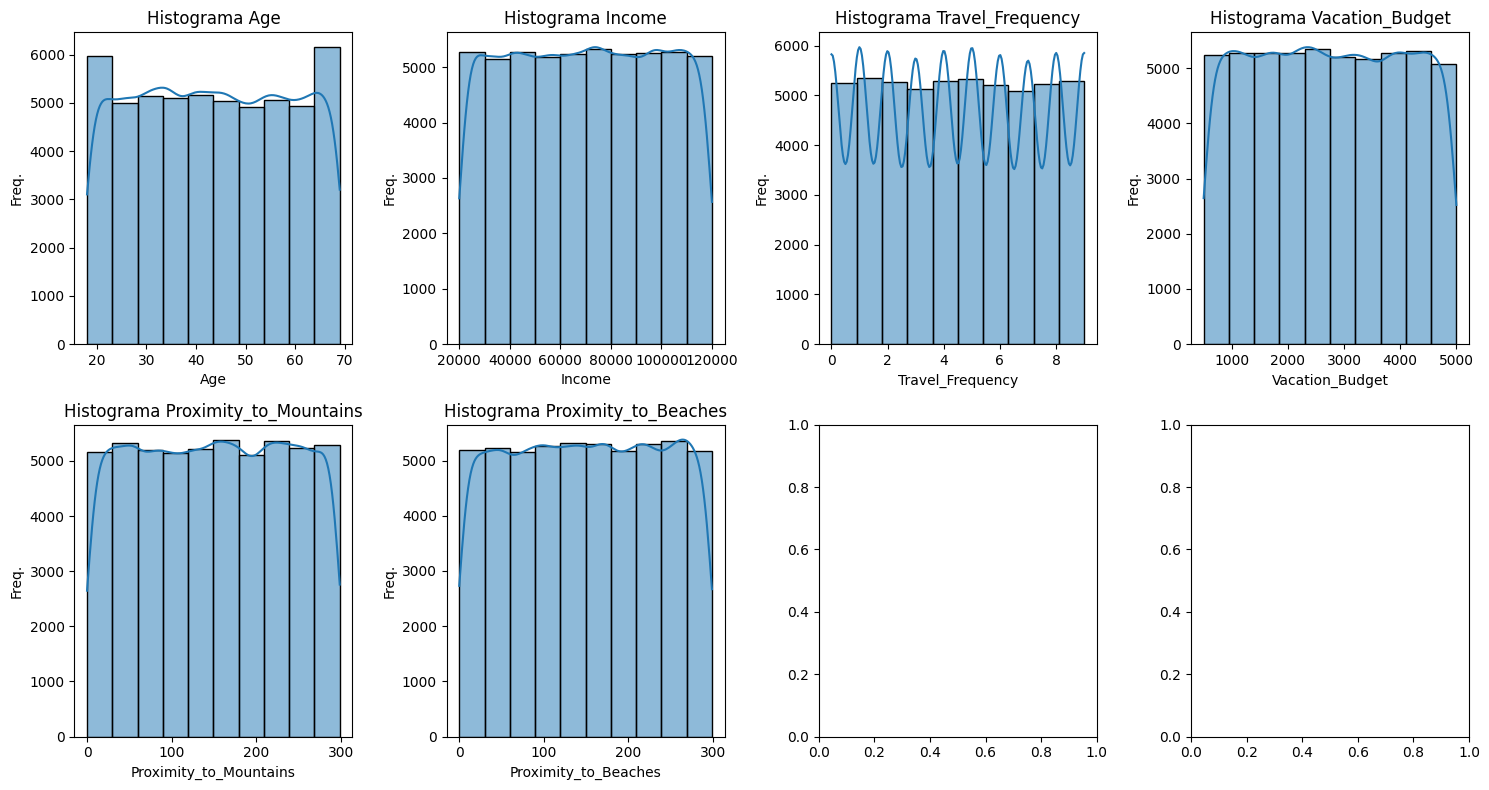

In [17]:
from utils.eda_utils import graficar_histogramas
from utils.eda_utils import obtener_columnas_numericas_df


columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas, nro_columnas=4, bins=10, kde=True, figsize=(15, 8))

De todos estos gráficos, podemos notar que las columnas no siguen una distribución normal.

##### Boxplots

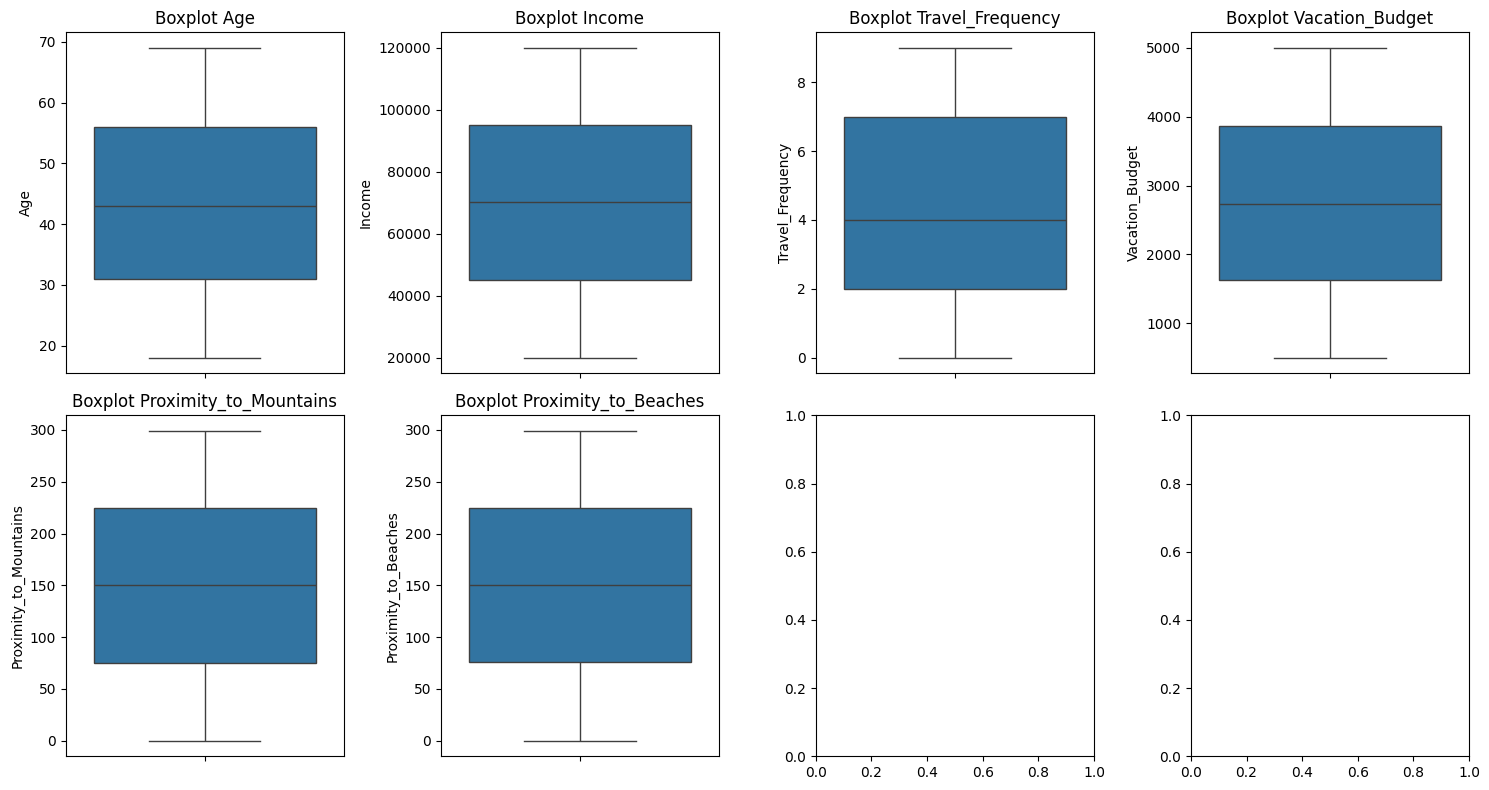

In [18]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=4, figsize=(15, 8))

Se puede notar en los boxplots que no se encuentran outliers. También, se puede notar que en términos de escala parece que los rangos son similares, sin contar la escala. Por lo que tal vez una buena alternativa de escalado sea utilizar la técnica MinMaxScaler.

#### Visualizar las correlaciones entre variables (mapa de calor de correlación).

##### Gráficos de dispersión de todos los campos vs columna sales

/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/2_modelos_de_clasificacion/5_proyecto_2_parte_2/selected_dataset/utils/eda_utils.py:208: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/2_modelos_de_clasificacion/5_proyecto_2_parte_2/selected_dataset/utils/eda_utils.py:208: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/2_modelos

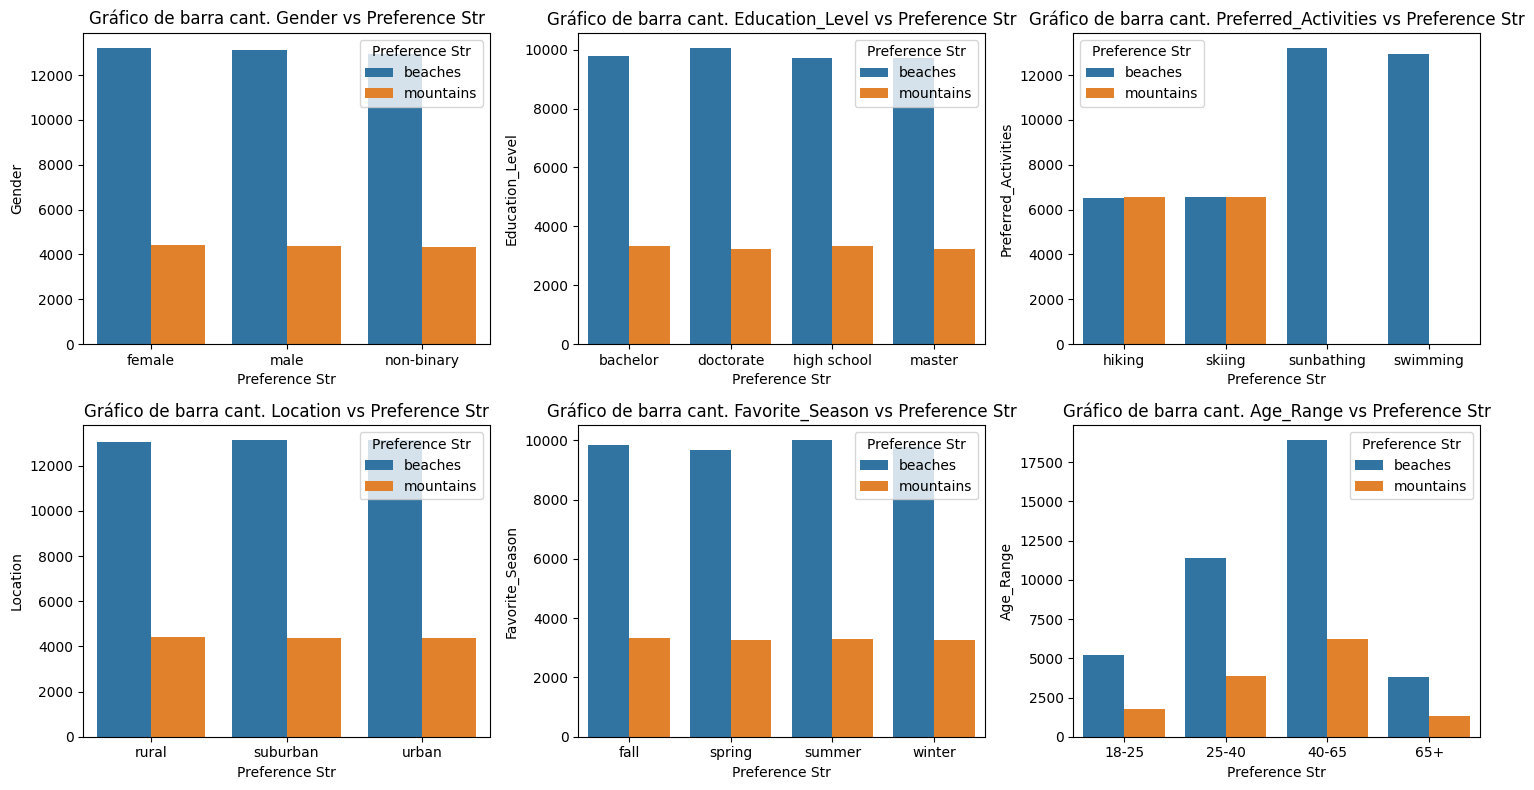

In [19]:
from utils.eda_utils import graficar_barras_conteo

df["Preference Str"] = df["Preference"].apply(lambda x: "mountains" if x else "beaches")


graficar_barras_conteo(df, columnas_categoricas, "Preference Str", figsize=(15, 8))

df.drop("Preference Str", axis=1, inplace=True)

De los gráficos de barra, podemos notar que tanto el rango de edad como la actividad influye en las preferencias, ya que se nota un icremento o decremento. Esto no se visualiza en otros gráficos, donde las cantidades son las mismas independientemente de la variable categórica siendo graficada.

##### Heatmap

                             Age    Income  Travel_Frequency  Vacation_Budget  \
Age                     1.000000 -0.000005          0.004428         0.002223   
Income                 -0.000005  1.000000         -0.000378        -0.000731   
Travel_Frequency        0.004428 -0.000378          1.000000         0.003593   
Vacation_Budget         0.002223 -0.000731          0.003593         1.000000   
Proximity_to_Mountains  0.006305 -0.005125          0.007187         0.001844   
Proximity_to_Beaches    0.002821  0.000956         -0.003404        -0.000507   
Preference Int          0.000990 -0.002998         -0.001680        -0.004754   

                        Proximity_to_Mountains  Proximity_to_Beaches  \
Age                                   0.006305              0.002821   
Income                               -0.005125              0.000956   
Travel_Frequency                      0.007187             -0.003404   
Vacation_Budget                       0.001844             -0.0

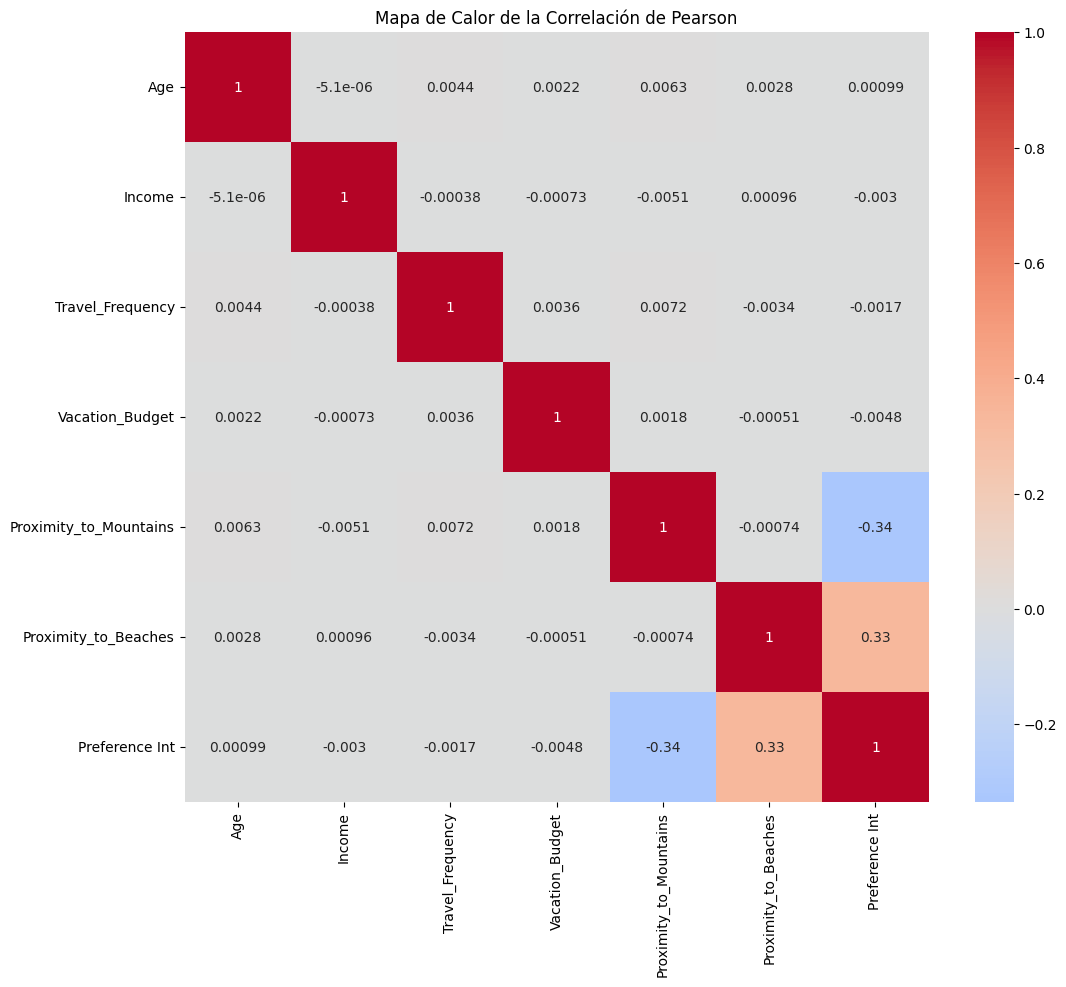

In [20]:
from utils.eda_utils import graficar_mapa_correlacion


df["Preference Int"] = df["Preference"].apply(lambda x: 1 if x else 0)


graficar_mapa_correlacion(df, columnas_numericas + ["Preference Int"], figsize=(12, 10))

df.drop("Preference Int", axis=1, inplace=True)

Podemos notar que las siguientes variables poseen una correlación con Preferences:

* Proximity_to_Mountains
* Proximity_to_Beaches

### Identificación de Valores Nulos y Outliers:

#### Detectar valores nulos y discutir cómo podrían ser tratados.

In [21]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Age,52444,0,0.0
Gender,52444,0,0.0
Income,52444,0,0.0
Education_Level,52444,0,0.0
Travel_Frequency,52444,0,0.0
Preferred_Activities,52444,0,0.0
Vacation_Budget,52444,0,0.0
Location,52444,0,0.0
Proximity_to_Mountains,52444,0,0.0
Proximity_to_Beaches,52444,0,0.0


No existen valores nulos en este dataset, por lo que no será necesario tratarlos.

#### Identificar outliers y evaluar su impacto potencial en el análisis.

In [22]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
Age,0.0,0.0,-6.500,93.500
Income,0.0,0.0,-30042.125,170198.875
Travel_Frequency,0.0,0.0,-5.500,14.500
Vacation_Budget,0.0,0.0,-1748.500,7239.500
Proximity_to_Mountains,0.0,0.0,-150.000,450.000
Proximity_to_Beaches,0.0,0.0,-148.125,448.875


No existen outliers en el dataset, por lo que no será necesario tratar estos datos.

### Resumen de Hallazgos:

Del EDA, se puede destacar lo siguiente

* El dataset es bueno para aplicar métodos de clasificación binarias y multiclase
* Según los histogramas, se puede notar que varias columnas no siguen una distribución estándar, pero tampoco existen outliers. Por lo cual, se puede considerar el uso de MinMaxScaler para el esccalamiento.
* No existen outliers
* Existen correlaciones entre Preference con las columnas Proximity_to_Beaches y Proximity_to_Mountains
* Se puede notar una relación entre Preference Preferred_Activity y Age_Range (agrupación de columna Age por rango de edad)

# Resolución Parte II

## Parte 1: Preprocesamiento de Datos

### 1. Limpieza de Datos:

#### Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).

Según el EDA realizado previamente, en este dataset no existen ni valores nulos, por lo que esta parte del proceso no es necesaria. En caso de serlo, se realizaría a través de imputters.

#### Manejar los outliers mediante técnicas de filtrado o transformación.

Tampoco se identifican outliers en el dataset. Por lo cual no es necesario filtrarlos o transformarlos.

### 2. Transformación de Columnas:

* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
* Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.
* Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.

Se harán los tres ítems en un solo paso.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     52444 non-null  int64   
 1   Gender                  52444 non-null  category
 2   Income                  52444 non-null  int64   
 3   Education_Level         52444 non-null  category
 4   Travel_Frequency        52444 non-null  int64   
 5   Preferred_Activities    52444 non-null  category
 6   Vacation_Budget         52444 non-null  int64   
 7   Location                52444 non-null  category
 8   Proximity_to_Mountains  52444 non-null  int64   
 9   Proximity_to_Beaches    52444 non-null  int64   
 10  Favorite_Season         52444 non-null  category
 11  Pets                    52444 non-null  bool    
 12  Environmental_Concerns  52444 non-null  bool    
 13  Preference              52444 non-null  bool    
 14  Age_Range             

In [24]:
columnas_seleccionadas_prediccion_numericas = [
    "Income",
    "Travel_Frequency",
    "Vacation_Budget",
    "Proximity_to_Mountains",
    "Proximity_to_Beaches",
]

columnas_seleccionadas_prediccion_categoricas = [
    "Gender",
    "Education_Level",
    "Preferred_Activities",
    "Location",
    "Favorite_Season",
    "Age_Range",
]

columnas_seleccionadas_prediccion_booleanas = [
    "Pets",
    "Environmental_Concerns"
]

columnas_prediccion = columnas_seleccionadas_prediccion_numericas + columnas_seleccionadas_prediccion_categoricas + columnas_seleccionadas_prediccion_booleanas

columna_salida = "Preference"

X = df[[*columnas_prediccion]]
y = df[columna_salida]

Education_Level parece ser una columna ordinal, por lo que analizamos sus valores únicos. Age_Range también es una columna ordinal.

In [25]:
df["Education_Level"].unique().tolist()

['bachelor', 'master', 'high school', 'doctorate']

Efectivamente, la columna Education_Level es ordinal, por lo que se opta para esta columna y Age_Range usar OrdinalEncoder y para el resto OneHotEncoder

In [26]:
df["Age_Range"].unique().tolist()

['40-65', '65+', '25-40', '18-25']

In [27]:
columnas_ordinales = [
    "Education_Level",
    "Age_Range",
]

In [28]:
print("Columnas Predicción:")

for columna in columnas_prediccion:
    print(f"-{columna}")

Columnas Predicción:
-Income
-Travel_Frequency
-Vacation_Budget
-Proximity_to_Mountains
-Proximity_to_Beaches
-Gender
-Education_Level
-Preferred_Activities
-Location
-Favorite_Season
-Age_Range
-Pets
-Environmental_Concerns


In [29]:
mapeo_columnas_ordinales = [
    {
        "col": "Education_Level",
        "mapping": [
            "high school",
            "bachelor",
            "master",
            "doctorate",
        ]
    },
    {
        "col": "Age_Range",
        "mapping": [
            "18-25",
            "25-40",
            "40-65",
            "65+",
        ]
    },
]

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

categories_ordinal_encoder = []
columnas_ordinal_encoder = []

# Preparamos los parámetros para el Ordinal Encoder.
for mapeo_columna in mapeo_columnas_ordinales:
    nombre_columna = mapeo_columna["col"]

    if nombre_columna in columnas_prediccion:
        mapeo_columnas = mapeo_columna["mapping"]

        categories_ordinal_encoder.append(mapeo_columnas)
        columnas_ordinal_encoder.append(nombre_columna)

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas_a_convertir_onehot = []

# Sacamos solamente las columnas que se requiera convertir a one hot,
# excluyendo las columnas ordinales.
for columna in columnas_categoricas:
    if columna not in columnas_ordinal_encoder and columna in columnas_prediccion:
        columnas_categoricas_a_convertir_onehot.append(columna)

preprocessor_no_scale = ColumnTransformer(
    transformers=[
        (
            "ordinal",
            OrdinalEncoder(categories=categories_ordinal_encoder),
            columnas_ordinal_encoder,
        ),
        (
            "onehot",
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            columnas_categoricas_a_convertir_onehot,
        ),
    ],
    remainder="passthrough"
)

columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas_a_escalar = []

# Obtenemos las columnas que requieren escalamiento.
for columna in columnas_numericas:
    if columna in columnas_prediccion:
        columnas_numericas_a_escalar.append(columna)

preprocessor_scale = ColumnTransformer(
    transformers=[
        (
            "min_max_scale",
            MinMaxScaler(),
            columnas_numericas_a_escalar,
        ),
        (
            "ordinal",
            OrdinalEncoder(categories=categories_ordinal_encoder),
            columnas_ordinal_encoder,
        ),
        (
            "onehot",
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            columnas_categoricas_a_convertir_onehot,
        ),
    ],
    remainder="passthrough"
)

In [31]:
X_transf_no_scale = preprocessor_no_scale.fit_transform(X)

df_transf_no_scale = pd.DataFrame(X_transf_no_scale, columns=preprocessor_no_scale.get_feature_names_out())

df_transf_no_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   ordinal__Education_Level                 52444 non-null  object
 1   ordinal__Age_Range                       52444 non-null  object
 2   onehot__Gender_female                    52444 non-null  object
 3   onehot__Gender_male                      52444 non-null  object
 4   onehot__Gender_non-binary                52444 non-null  object
 5   onehot__Preferred_Activities_hiking      52444 non-null  object
 6   onehot__Preferred_Activities_skiing      52444 non-null  object
 7   onehot__Preferred_Activities_sunbathing  52444 non-null  object
 8   onehot__Preferred_Activities_swimming    52444 non-null  object
 9   onehot__Location_rural                   52444 non-null  object
 10  onehot__Location_suburban                52444 non-null  o

In [32]:
X_transf_scale = preprocessor_scale.fit_transform(X)

df_transf_scale = pd.DataFrame(X_transf_scale, columns=preprocessor_scale.get_feature_names_out())

df_transf_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   min_max_scale__Income                    52444 non-null  float64
 1   min_max_scale__Travel_Frequency          52444 non-null  float64
 2   min_max_scale__Vacation_Budget           52444 non-null  float64
 3   min_max_scale__Proximity_to_Mountains    52444 non-null  float64
 4   min_max_scale__Proximity_to_Beaches      52444 non-null  float64
 5   ordinal__Education_Level                 52444 non-null  float64
 6   ordinal__Age_Range                       52444 non-null  float64
 7   onehot__Gender_female                    52444 non-null  float64
 8   onehot__Gender_male                      52444 non-null  float64
 9   onehot__Gender_non-binary                52444 non-null  float64
 10  onehot__Preferred_Activities_hiking      52444

Con respecto al Pipeline, se implementará junto con los modelos de predicción. De igual manera, se mostró un ColumnTransformer que agrupa todos los pasos de preprocesamiento en uno.

## Parte 2: Selección de Técnica de Machine Learning

### 1. Entrenamiento Inicial:

#### Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).

Importamos las librerías necesarias

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline

Dividimos el dataset en train y test.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

##### Regresión Logística.

In [35]:
lr = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=20000,
    tol=1e-4,
    random_state=42,
)

pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', lr)
    ]
)

pipeline_lr.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['high '
                                                                              'school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'doctorate'],
                                                                             ['18-25',
                                                                              '25-40',
                                                                              '40-65',
                                                                              '65+']]),
                                                  ['Education_Level',
                                                   'Age_Range']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Preferred_Activities',
                                                   'Location',
                                                   'Favorite_Season'])])),
                ('model', LogisticRegression(max_iter=20000, random_state=42))])

##### KNN.

In [36]:
# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor_scale),
        ('model', knn)
    ]
)

pipeline_knn.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scale',
                                                  MinMaxScaler(),
                                                  ['Income', 'Travel_Frequency',
                                                   'Vacation_Budget',
                                                   'Proximity_to_Mountains',
                                                   'Proximity_to_Beaches']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['high '
                                                                              'school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'doctorate'],
                                                                             ['18-25',
                                                                              '25-40',
                                                                              '40-65',
                                                                              '65+']]),
                                                  ['Education_Level',
                                                   'Age_Range']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Preferred_Activities',
                                                   'Location',
                                                   'Favorite_Season'])])),
                ('model', KNeighborsClassifier())])

##### Árbol de Decisión.

In [59]:
# Entrenar el modelo Árbol de Decisión
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', dt)
    ]
)

pipeline_dt.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['high '
                                                                              'school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'doctorate'],
                                                                             ['18-25',
                                                                              '25-40',
                                                                              '40-65',
                                                                              '65+']]),
                                                  ['Education_Level',
                                                   'Age_Range']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Preferred_Activities',
                                                   'Location',
                                                   'Favorite_Season'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

##### Random Forests.

In [38]:
pipeline_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42))
    ]
)

pipeline_rf.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['high '
                                                                              'school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'doctorate'],
                                                                             ['18-25',
                                                                              '25-40',
                                                                              '40-65',
                                                                              '65+']]),
                                                  ['Education_Level',
                                                   'Age_Range']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Preferred_Activities',
                                                   'Location',
                                                   'Favorite_Season'])])),
                ('model',
                 RandomForestClassifier(max_depth=3, n_estimators=10,
                                        random_state=42))])

#### Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.

In [39]:
score_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5).mean()
score_knn = cross_val_score(pipeline_knn, X_train, y_train, cv=5).mean()
score_dt = cross_val_score(pipeline_dt, X_train, y_train, cv=5).mean()
score_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5).mean()

print(f"Promedio score Regresión Logística: {score_lr}")
print(f"Promedio score K Nearest Neighbor: {score_knn}")
print(f"Promedio score Árbol de Decisión: {score_dt}")
print(f"Promedio score Random Forests: {score_dt}")

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Promedio score Regresión Logística: 0.9976300735494416
Promedio score K Nearest Neighbor: 0.8342413511304821
Promedio score Árbol de Decisión: 0.9937619177335876
Promedio score Random Forests: 0.9937619177335876


Al parecer, el mejor score para este dataset es el de la regresión logística. No obstante, hay que corroborar con otros métodos y con y_test.

### 2. Comparación de Modelos:

#### Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).

In [60]:
# Reentrenamos los modelos ya que el cross val score pudo haber cambiado los parámetros.
pipeline_lr.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['high '
                                                                              'school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'doctorate'],
                                                                             ['18-25',
                                                                              '25-40',
                                                                              '40-65',
                                                                              '65+']]),
                                                  ['Education_Level',
                                                   'Age_Range']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Preferred_Activities',
                                                   'Location',
                                                   'Favorite_Season'])])),
                ('model',
                 RandomForestClassifier(max_depth=3, n_estimators=10,
                                        random_state=42))])

Creamos los reportes de clasificación y matrices de confusión.

In [41]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)

from utils.classification_utils import graficar_matrices_confusion

In [42]:
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

classification_report_lr = classification_report(y_test, y_pred_lr)
classification_report_knn = classification_report(y_test, y_pred_knn)
classification_report_dt = classification_report(y_test, y_pred_dt)
classification_report_rf = classification_report(y_test, y_pred_rf)

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [61]:
from utils.classification_utils import calcular_resumen_metricas_modelos


calcular_resumen_metricas_modelos(
    [pipeline_lr, pipeline_knn, pipeline_dt, pipeline_rf],
    X_test,
    y_test,
    ["Regresión Logística", "KNN", "Árbol de Decisión", "Random Forests"]
)

                     Accuracy  Precision    Recall  F1-Score
Regresión Logística  0.997204   0.997414  0.991262  0.994328
KNN                  0.835134   0.662981  0.677975  0.670394
Árbol de Decisión    0.902250   0.809361  0.791056  0.800104
Random Forests       0.762743   1.000000  0.040607  0.078044


Mejores modelos por métrica:

Accuracy     Regresión Logística
Precision         Random Forests
Recall       Regresión Logística
F1-Score     Regresión Logística
dtype: object


Imprimimos los reportes de clasificación

In [44]:
print("Repote Clasificación LR")
print(classification_report_lr)
print("\n")

print("Repote Clasificación KNN")
print(classification_report_knn)
print("\n")

print("Repote Clasificación DT")
print(classification_report_dt)
print("\n")

print("Repote Clasificación RF")
print(classification_report_rf)
print("\n")

Repote Clasificación LR
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11843
        True       1.00      0.99      0.99      3891

    accuracy                           1.00     15734
   macro avg       1.00      1.00      1.00     15734
weighted avg       1.00      1.00      1.00     15734



Repote Clasificación KNN
              precision    recall  f1-score   support

       False       0.89      0.89      0.89     11843
        True       0.66      0.68      0.67      3891

    accuracy                           0.84     15734
   macro avg       0.78      0.78      0.78     15734
weighted avg       0.84      0.84      0.84     15734



Repote Clasificación DT
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11843
        True       0.99      0.99      0.99      3891

    accuracy                           0.99     15734
   macro avg       0.99      0.99      0.99     157

De todos estos modelos, el más adecuado parece ser la regresión logística.

Graficamos las matrices de confusión

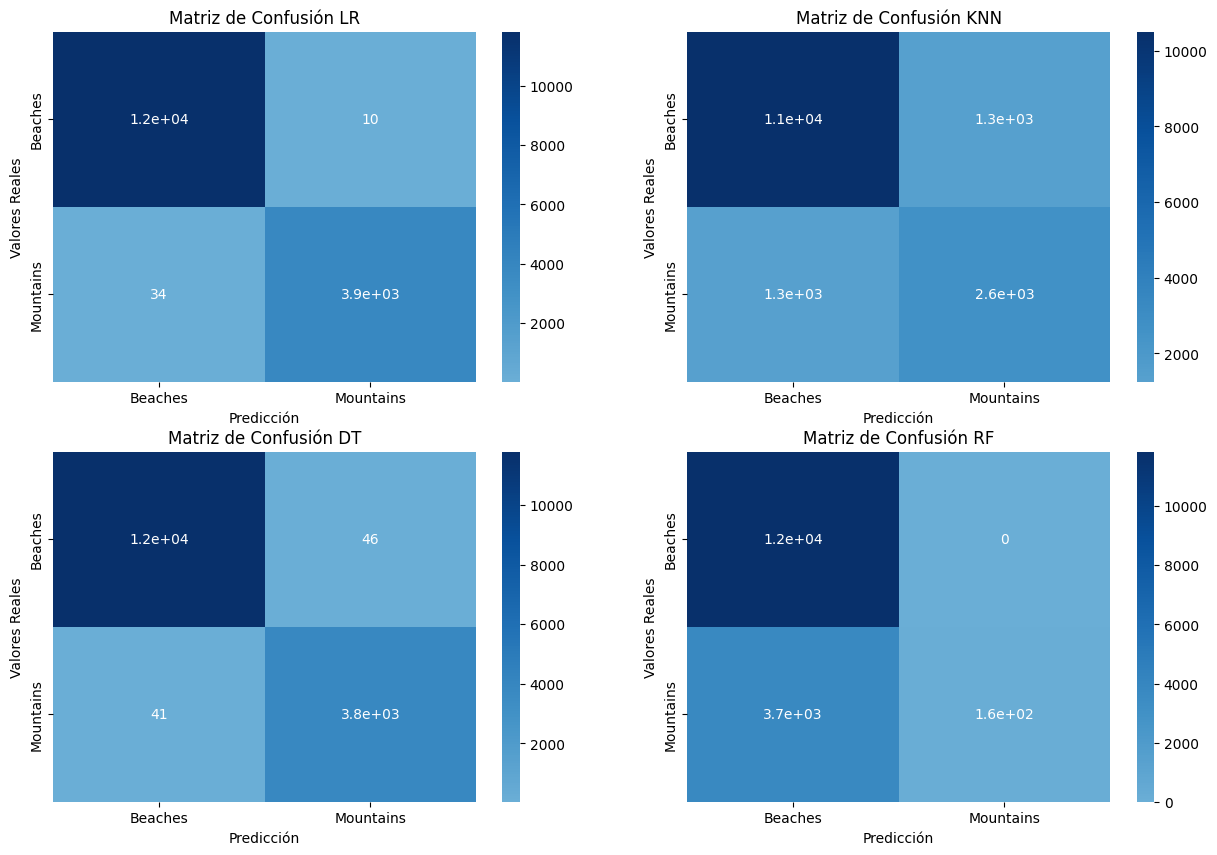

In [65]:
graficar_matrices_confusion(
    [conf_matrix_lr, conf_matrix_knn, conf_matrix_dt, conf_matrix_rf],
    ["LR", "KNN", "DT", "RF"],
    labels=["Beaches", "Mountains"],
    nro_columnas=2,
    figsize=(15, 10),
)

Podemos notar de los reportes de clasificación y matris de confusión, que el mejor modelo es la Regresión Logística.

Curva ROC/AUC para Regresión Logística.

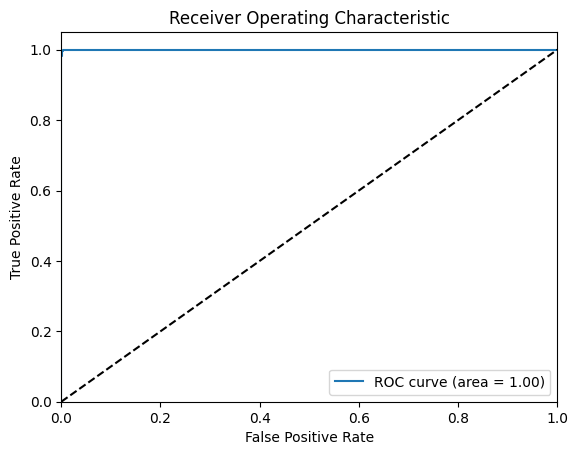

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = pipeline_lr.predict(X_test)
y_prob = pipeline_lr.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.

El mejor método y por ende el seleccionado es el de la Regresión Logística.

## Parte 3: Optimización de Hiperparámetros

### 1. GridSearchCV

#### Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.
#### Definir el espacio de búsqueda para los hiperparámetros relevantes.

Se realizarán los dos ítems en el mismo bloque de código.

In [47]:
from time import time

from sklearn.model_selection import GridSearchCV


pipeline_lr_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', GridSearchCV(
            LogisticRegression(
                max_iter=30000,            # Número máximo de iteraciones
                tol=1e-4,                # Tolerancia para el criterio de parada
                random_state=42 # Semilla para la reproducibilidad
            ),
            param_grid={
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

inicio = time()


pipeline_lr_gscv.fit(X_train, y_train)

fin = time()

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.1s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.1s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.1s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.2s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  18.6s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  15.7s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  23.5s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  14.6s
[CV] END ..............................C=0.001, solver=lbfgs; total time=  18.3s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.1s
[CV] END ..........................C=0.001, sol

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.2s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.5s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.4s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.3s
[CV] END ...............................C=0.01, solver=lbfgs; total time=  29.4s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, solver=lbfgs; total time=  37.4s
[CV] END ...............................C=0.01, solver=lbfgs; total time=  28.4s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, solver=lbfgs; total time=  35.5s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, solver=lbfgs; total time=  35.8s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END .................................C=0.01, solver=sag; total time=   2.6s
[CV] END .................................C=0.01, solver=sag; total time=   2.6s
[CV] END .................................C=0.01, solver=sag; total time=   2.6s
[CV] END .................................C=0.01, solver=sag; total time=   2.7s
[CV] END .................................C=0.01, solver=sag; total time=   2.6s
[CV] END ................................C=0.01, solver=saga; total time=   4.6s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=0.1, solver=newton-cg; total time=   2.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=0.1, solver=newton-cg; total time=   2.8s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=0.1, solver=newton-cg; total time=   2.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=0.1, solver=newton-cg; total time=   2.7s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=0.1, solver=newton-cg; total time=   3.3s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  33.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  32.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  32.4s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  33.3s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  30.8s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.2s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ..................................C=0.1, solver=sag; total time=   2.6s
[CV] END ..................................C=0.1, solver=sag; total time=   2.7s
[CV] END ..................................C=0.1, solver=sag; total time=   2.7s
[CV] END ..................................C=0.1, solver=sag; total time=   2.8s
[CV] END ..................................C=0.1, solver=sag; total time=   2.7s
[CV] END .................................C=0.1, solver=saga; total time=   5.0s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ..............................C=1, solver=newton-cg; total time=   3.5s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ..............................C=1, solver=newton-cg; total time=   2.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ..............................C=1, solver=newton-cg; total time=   3.7s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ..............................C=1, solver=newton-cg; total time=   3.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ..............................C=1, solver=newton-cg; total time=   2.9s
[CV] END ..................................C=1, solver=lbfgs; total time=  19.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=1, solver=lbfgs; total time=  33.8s
[CV] END ..................................C=1, solver=lbfgs; total time=  29.9s
[CV] END ..................................C=1, solver=lbfgs; total time=  17.4s
[CV] END ..................................C=1, solver=lbfgs; total time=  32.6s
[CV] END ..............................C=1, solver=liblinear; total time=   0.1s
[CV] END ..............................C=1, solver=liblinear; total time=   0.1s
[CV] END ..............................C=1, solver=liblinear; total time=   0.1s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.1s
[CV] END ....................................C=1, solver=sag; total time=   2.5s
[CV] END ....................................C=1, solver=sag; total time=   2.7s
[CV] END ....................................C=1, solver=sag; total time=   2.6s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   3.9s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   3.5s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   4.4s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   3.3s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   3.1s
[CV] END .................................C=10, solver=lbfgs; total time=  30.6s
[CV] END .................................C=10, solver=lbfgs; total time=  25.8s
[CV] END .................................C=10, solver=lbfgs; total time=  19.0s
[CV] END .................................C=10, solver=lbfgs; total time=  24.0s
[CV] END .................................C=10, solver=lbfgs; total time=  28.9s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END ...................................C=10, solver=sag; total time=   2.6s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=100, solver=newton-cg; total time=   3.9s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=100, solver=newton-cg; total time=   3.9s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=100, solver=newton-cg; total time=   4.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=100, solver=newton-cg; total time=   3.4s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=100, solver=newton-cg; total time=   4.8s
[CV] END ................................C=100, solver=lbfgs; total time=  24.8s
[CV] END ................................C=100, solver=lbfgs; total time=  18.4s
[CV] END ................................C=100, solver=lbfgs; total time=  22.2s
[CV] END ................................C=100, solver=lbfgs; total time=  31.1s
[CV] END ................................C=100, solver=lbfgs; total time=  31.3s
[CV] END ............................C=100, solver=liblinear; total time=   0.1s
[CV] END ............................C=100, solver=liblinear; total time=   0.1s
[CV] END ............................C=100, solver=liblinear; total time=   0.2s
[CV] END ............................C=100, solver=liblinear; total time=   0.1s
[CV] END ............................C=100, solver=liblinear; total time=   0.1s
[CV] END ..................................C=100, solver=sag; total time=   2.6s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=1000, solver=newton-cg; total time=   4.5s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=1000, solver=newton-cg; total time=   4.0s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=1000, solver=newton-cg; total time=   4.2s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=1000, solver=newton-cg; total time=   5.0s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=1000, solver=newton-cg; total time=   3.8s
[CV] END ...............................C=1000, solver=lbfgs; total time=  30.8s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=1000, solver=lbfgs; total time=  32.1s
[CV] END ...............................C=1000, solver=lbfgs; total time=  25.4s
[CV] END ...............................C=1000, solver=lbfgs; total time=  18.4s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=1000, solver=lbfgs; total time=  31.6s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.1s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.1s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.1s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.1s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.1s
[CV] END .................................C=1000, solver=sag; total time=   2.7s
[CV] END .................................C=1000, solver=sag; total time=   2.7s
[CV] END .................................C=1000, solver=sag; total time=   2.6s
[CV] END .................................C=1000, solver=sag; total time=   2.7s
[CV] END .................................C=1000, solver=sag; total time=   2.6s
[CV] END ................................C=1000, solver=saga; total time=   4.7s
[CV] END ...................

In [48]:
duracion = fin - inicio
print(f"Duración del Proceso en segundos: {duracion}")

Duración del Proceso en segundos: 1348.9694437980652


In [49]:
params = pipeline_lr_gscv.steps[-1][1].best_params_

params

{'C': 1000, 'solver': 'lbfgs'}

### 2. RandomizedSearchCV:

#### Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.


In [50]:
from sklearn.model_selection import RandomizedSearchCV


pipeline_lr_rscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor_no_scale),
        ('model', RandomizedSearchCV(
            LogisticRegression(
                max_iter=30000,            # Número máximo de iteraciones
                tol=1e-4,                # Tolerancia para el criterio de parada
                random_state=42 # Semilla para la reproducibilidad
            ),
            param_distributions={
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            },
            n_iter=50,
            scoring='accuracy',
            cv=5,
            n_jobs=-1,
            random_state=42,
            refit=True,
            verbose=2,
        )),
    ]
)

inicio = time()


pipeline_lr_rscv.fit(X_train, y_train)

fin = time()

Fitting 5 folds for each of 35 candidates, totalling 175 fits


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 35 is smaller than n_iter=50. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.5s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.5s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.5s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.6s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.2s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.2s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   2.7s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.2s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.2s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.3s
[CV] END ................................C=0.001, solver=sag; total time=  10.3s
[CV] END ................................C=0.001, solver=sag; total time=  10.3s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.0s
[CV] END ................................C=0.001, solver=sag; total time=   9.3s
[CV] END ................................C=0.001, solver=sag; total time=   9.3s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarnin

[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.2s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.2s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.3s
[CV] END ...........................C=0.01, solver=newton-cg; total time=   2.2s
[CV] END ...............................C=0.001, solver=saga; total time=  17.2s
[CV] END ...............................C=0.001, solver=saga; total time=  18.4s
[CV] END ...............................C=0.001, solver=saga; total time=  17.6s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.2s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.2s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.2s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.2s
[CV] END ...............................C=0.001, solver=saga; total time=  18.9s
[CV] END ...............................C=0.001, solver=saga; total time=  19.2s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=0.01, solver=lbfgs; total time=  30.2s
[CV] END .................................C=0.01, solver=sag; total time=  10.6s
[CV] END .................................C=0.01, solver=sag; total time=   9.9s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=0.1, solver=newton-cg; total time=   1.7s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/d

[CV] END ...............................C=0.01, solver=lbfgs; total time=  28.5s
[CV] END ...............................C=0.01, solver=lbfgs; total time=  30.4s
[CV] END ............................C=0.1, solver=newton-cg; total time=   2.2s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarnin

[CV] END ............................C=0.1, solver=newton-cg; total time=   2.2s
[CV] END ............................C=0.1, solver=newton-cg; total time=   2.4s
[CV] END ............................C=0.1, solver=newton-cg; total time=   2.5s
[CV] END ................................C=0.01, solver=saga; total time=  17.3s
[CV] END ................................C=0.01, solver=saga; total time=  17.3s
[CV] END ................................C=0.01, solver=saga; total time=  16.8s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.2s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.2s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.2s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.2s
[CV] END ................................C=0.01, solver=saga; total time=  17.4s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

[CV] END ................................C=0.1, solver=lbfgs; total time=  26.9s
[CV] END ................................C=0.1, solver=lbfgs; total time=  27.5s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  27.6s
[CV] END ..................................C=0.1, solver=sag; total time=  10.0s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  26.9s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................................C=0.1, solver=lbfgs; total time=  27.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ..............................C=1, solver=newton-cg; total time=   2.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ..............................C=1, solver=newton-cg; total time=   2.3s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ..............................C=1, solver=newton-cg; total time=   2.5s
[CV] END ..............................C=1, solver=newton-cg; total time=   2.4s
[CV] END ..............................C=1, solver=newton-cg; total time=   2.8s
[CV] END .................................C=0.1, solver=saga; total time=  16.2s
[CV] END .................................C=0.1, solver=saga; total time=  16.0s
[CV] END .................................C=0.1, solver=saga; total time=  15.6s
[CV] END .................................C=0.1, solver=saga; total time=  15.8s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.2s
[CV] END .................................C=0.1, solver=saga; total time=  16.2s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................................C=1, solver=lbfgs; total time=  27.7s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   2.8s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   2.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   2.4s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END .............................C=10, solver=newton-cg; total time=   2.6s
[CV] END ...................................C=1, solver=saga; total time=  14.3s
[CV] END .............................C=10, solver=newton-cg; total time=   2.3s
[CV] END ...................................C=1, solver=saga; total time=  14.7s
[CV] END ...................................C=1, solver=saga; total time=  14.8s
[CV] END ..................................C=1, solver=lbfgs; total time=  26.3s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.2s
[CV] END .............................C=10, solver=liblinear; total time=   0.2s
[CV] END .............................C=10, solver=liblinear; total time=   0.1s
[CV] END ...................................C=1, solver=saga; total time=  15.0s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...................................C=10, solver=sag; total time=   8.7s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=100, solver=newton-cg; total time=   2.1s
[CV] END ............................C=100, solver=newton-cg; total time=   2.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ............................C=100, solver=newton-cg; total time=   3.5s
[CV] END ............................C=100, solver=newton-cg; total time=   2.4s
[CV] END ............................C=100, solver=newton-cg; total time=   3.0s
[CV] END ..................................C=10, solver=saga; total time=  15.2s
[CV] END ..................................C=10, solver=saga; total time=  15.5s
[CV] END ..................................C=10, solver=saga; total time=  15.5s
[CV] END ............................C=100, solver=liblinear; total time=   0.1s
[CV] END ............................C=100, solver=liblinear; total time=   0.1s
[CV] END ............................C=100, solver=liblinear; total time=   0.2s
[CV] END ............................C=100, solver=liblinear; total time=   0.2s
[CV] END ............................C=100, solver=liblinear; total time=   0.2s
[CV] END ..................................C=10, solver=saga; total time=  15.9s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ................................C=100, solver=lbfgs; total time=  22.8s
[CV] END ...........................C=1000, solver=newton-cg; total time=   3.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ................................C=100, solver=lbfgs; total time=  22.6s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=1000, solver=newton-cg; total time=   2.7s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END ...........................C=1000, solver=newton-cg; total time=   2.9s
[CV] END ...........................C=1000, solver=newton-cg; total time=   3.2s
[CV] END ...........................C=1000, solver=newton-cg; total time=   2.4s
[CV] END .................................C=100, solver=saga; total time=  15.1s
[CV] END .................................C=100, solver=saga; total time=  14.8s
[CV] END .................................C=100, solver=saga; total time=  15.6s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.1s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.1s
[CV] END .................................C=100, solver=saga; total time=  15.2s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.2s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.2s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.2s
[CV] END ...................

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=1000, solver=lbfgs; total time=  22.7s
[CV] END .................................C=1000, solver=sag; total time=   9.1s
[CV] END .................................C=1000, solver=sag; total time=   9.2s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................C=1000, solver=lbfgs; total time=  22.7s
[CV] END ................................C=1000, solver=saga; total time=  11.6s
[CV] END ................................C=1000, solver=saga; total time=  10.6s
[CV] END ................................C=1000, solver=saga; total time=  10.5s
[CV] END ................................C=1000, solver=saga; total time=   9.9s
[CV] END ................................C=1000, solver=saga; total time=   7.4s


In [51]:
duracion = fin - inicio
print(f"Duración del Proceso en segundos: {duracion}")

Duración del Proceso en segundos: 250.83314990997314


In [52]:
params = pipeline_lr_rscv.steps[-1][1].best_params_

params

{'solver': 'lbfgs', 'C': 1000}

### Optuna:

#### Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.

In [53]:
import optuna


def objective(trial):
    # Definir los hiperparámetros a optimizar
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    max_iter = trial.suggest_int('max_iter', 50, 300)
    
    # Crear el modelo de Regresión Logística con los hiperparámetros sugeridos
    model = Pipeline(
        steps=[
            ('preprocessor', preprocessor_no_scale),
            ('model', LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=max_iter, random_state=42))
        ]
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular la exactitud
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Crear un estudio de Optuna y optimizar la función objetivo
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(study.best_params)

# Mostrar la mejor exactitud obtenida
print(f"Mejor exactitud obtenida: {study.best_value}")

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_60003/3759509026.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_60003/3759509026.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

Mejores hiperparámetros encontrados:
{'penalty': 'l1', 'C': 10.96662004870741, 'solver': 'liblinear', 'max_iter': 194}
Mejor exactitud obtenida: 0.9992373204525232


In [54]:
duracion = fin - inicio
print(f"Duración del Proceso en segundos: {duracion}")

Duración del Proceso en segundos: 250.83314990997314


### Evaluación de Modelos Optimizados:

#### Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.

Entrenamos el modelo.

In [55]:
mejores_params_gscv = pipeline_lr_gscv.steps[-1][1].best_params_
mejores_params_rscv = pipeline_lr_gscv.steps[-1][1].best_params_
mejores_params_optuna = study.best_params

print(f"Mejores params gridsearchcv: {str(mejores_params_gscv)}")
print(f"Mejores params randomizedsearchcv: {str(mejores_params_rscv)}")
print(f"Mejores params optuna: {str(mejores_params_optuna)}")

pipeline_best_lr_gscv = Pipeline(
    steps=[
        ("preprocessor", preprocessor_no_scale),
        ("model", LogisticRegression(
            **mejores_params_gscv,
            max_iter=30000,            # Número máximo de iteraciones
            tol=1e-4,                # Tolerancia para el criterio de parada
            random_state=42 # Semilla para la reproducibilidad
        ))
    ]
)

pipeline_best_lr_rscv = Pipeline(
    steps=[
        ("preprocessor", preprocessor_no_scale),
        ("model", LogisticRegression(
            **mejores_params_rscv,
            max_iter=30000,            # Número máximo de iteraciones
            tol=1e-4,                # Tolerancia para el criterio de parada
            random_state=42 # Semilla para la reproducibilidad
        ))
    ]
)

pipeline_best_lr_optuna = Pipeline(
    steps=[
        ("preprocessor", preprocessor_no_scale),
        ("model", LogisticRegression(
            **mejores_params_optuna,
            random_state=42 # Semilla para la reproducibilidad
        ))
    ]
)

pipeline_best_lr_gscv.fit(X_train, y_train)
pipeline_best_lr_rscv.fit(X_train, y_train)
pipeline_best_lr_optuna.fit(X_train, y_train)

Mejores params gridsearchcv: {'C': 1000, 'solver': 'lbfgs'}
Mejores params randomizedsearchcv: {'C': 1000, 'solver': 'lbfgs'}
Mejores params optuna: {'penalty': 'l1', 'C': 10.96662004870741, 'solver': 'liblinear', 'max_iter': 194}


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['high '
                                                                              'school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'doctorate'],
                                                                             ['18-25',
                                                                              '25-40',
                                                                              '40-65',
                                                                              '65+']]),
                                                  ['Education_Level',
                                                   'Age_Range']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Preferred_Activities',
                                                   'Location',
                                                   'Favorite_Season'])])),
                ('model',
                 LogisticRegression(C=10.96662004870741, max_iter=194,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

#### Comparar el rendimiento del modelo optimizado con el modelo inicial.

In [56]:
classification_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

y_pred_lr_gscv = pipeline_best_lr_gscv.predict(X_test)
y_pred_lr_rscv = pipeline_best_lr_rscv.predict(X_test)
y_pred_lr_optuna = pipeline_best_lr_optuna.predict(X_test)

classification_report_lr_gscv = classification_report(y_test, y_pred_lr_gscv)
conf_matrix_lr_gscv = confusion_matrix(y_test, y_pred_lr_gscv)
classification_report_lr_rscv = classification_report(y_test, y_pred_lr_rscv)
conf_matrix_lr_rscv = confusion_matrix(y_test, y_pred_lr_rscv)
classification_report_lr_optuna = classification_report(y_test, y_pred_lr_optuna)
conf_matrix_lr_optuna = confusion_matrix(y_test, y_pred_lr_optuna)

In [57]:
print("Reporte sin Optimizar")
print(classification_report_lr)
print("\n")
print("Reporte GridSearchCV")
print(classification_report_lr_gscv)
print("\n")
print("Reporte RandomizedSearchCV")
print(classification_report_lr_rscv)
print("\n")
print("Reporte Optuna")
print(classification_report_lr_optuna)
print("\n")

Reporte sin Optimizar
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11843
        True       1.00      0.99      0.99      3891

    accuracy                           1.00     15734
   macro avg       1.00      1.00      1.00     15734
weighted avg       1.00      1.00      1.00     15734



Reporte GridSearchCV
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11843
        True       1.00      1.00      1.00      3891

    accuracy                           1.00     15734
   macro avg       1.00      1.00      1.00     15734
weighted avg       1.00      1.00      1.00     15734



Reporte RandomizedSearchCV
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     11843
        True       1.00      1.00      1.00      3891

    accuracy                           1.00     15734
   macro avg       1.00      1.00      1.00     15734


De los reportes de clasificación, podemos notar que los tres optimizadores mejoraron el rendimiento del modelo.

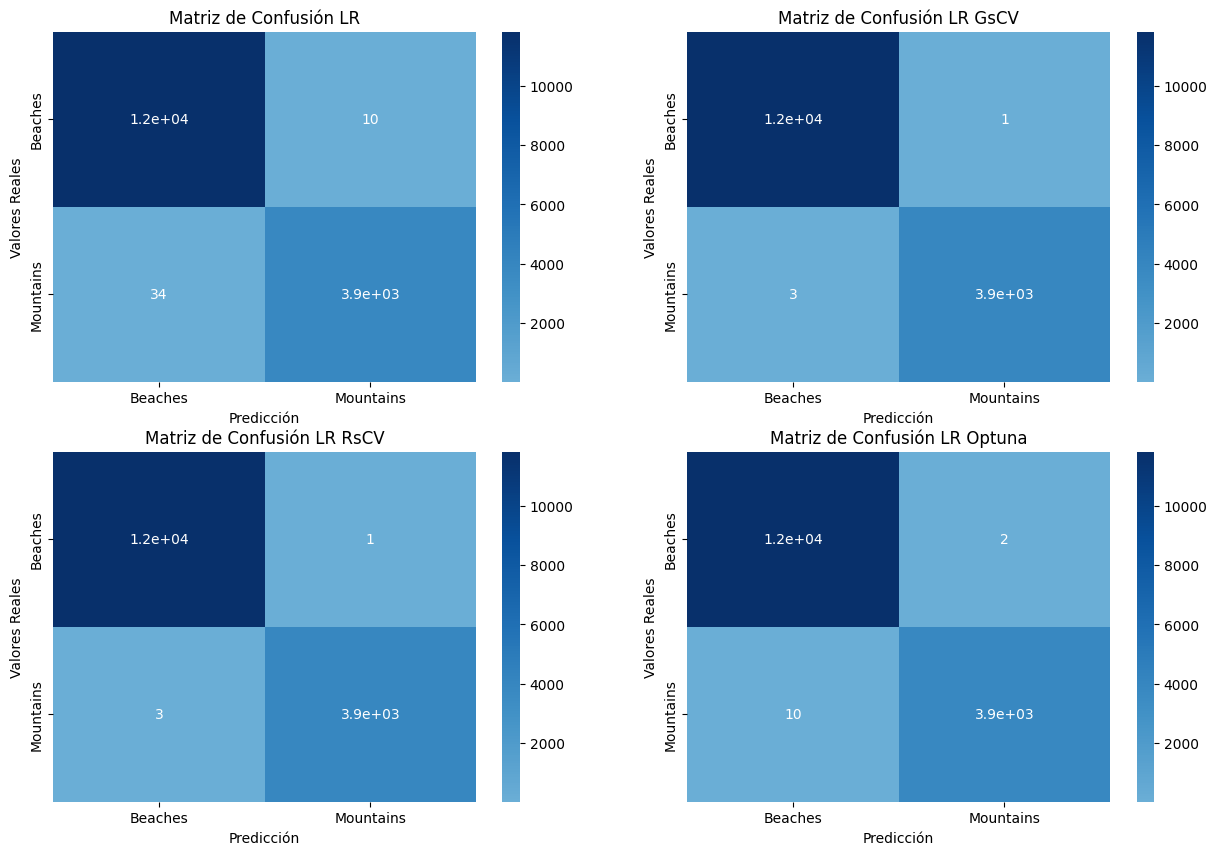

In [58]:
graficar_matrices_confusion(
    [conf_matrix_lr, conf_matrix_lr_gscv, conf_matrix_lr_rscv, conf_matrix_lr_optuna],
    ["LR", "LR GsCV", "LR RsCV", "LR Optuna"],
    labels=["Beaches", "Mountains"],
    nro_columnas=2,
    figsize=(15, 10),
)

De la matriz de confusión, podemos notar que efectivamente el modelo optimizado mejoró mucho más el rendimiento, teniendo una menor cantidad de errores. Los mejores métodos para optimizar en este caso fueron GridSearchCV y RandomizedSearchCV. Los que menor tiempo tomaron fueron RandomizedSearchCV y optuna. No obstante, en este caso RandomizedSearchCV tuvo un mejor resultado.